In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Conv1D, MaxPooling1D
from keras import Input
# from keras.layers import Conv1D, MaxPooling1D

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 100 # 100일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

temp_data = df['value'].values

scaler = MinMaxScaler()
temp_data_scaled = scaler.fit_transform(temp_data.reshape(-1, 1))[:, 0]

# 이후 10일 데이터 예측
X_scaled = np.array([temp_data_scaled[i:i+n] for i in range(len(df)-n-test_num+1)])
y_scaled = np.array([temp_data_scaled[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

X_scaled = X_scaled.reshape((-1, n, 1))
y_scaled = y_scaled.reshape((-1, 10, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

from keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(np.array(X_scaled), np.array(y_scaled), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # Model 1 - 100 to 10



In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n, 1)))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))

model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(10, activation='relu'))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 99, 128)           384       
                                                                 
 batch_normalization_6 (Bat  (None, 99, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 49, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 48, 64)            16448     
                                                                 
 batch_normalization_7 (Bat  (None, 48, 64)            256       
 chNormalization)                                                
                                                      

In [ ]:
history1 = model1.fit(X_train_scaled, y_train_scaled,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_split=0.2,
                        callbacks=[custom_early_stopping])

Epoch 1/100
518/518 [==============================] - 7s 7ms/step - loss: 0.0468 - mae: 0.1606 - val_loss: 0.0370 - val_mae: 0.1446
Epoch 2/100
518/518 [==============================] - 4s 7ms/step - loss: 0.0227 - mae: 0.1060 - val_loss: 0.0162 - val_mae: 0.0872
Epoch 3/100
518/518 [==============================] - 5s 9ms/step - loss: 0.0167 - mae: 0.0865 - val_loss: 0.0153 - val_mae: 0.0802
Epoch 4/100
518/518 [==============================] - 4s 8ms/step - loss: 0.0161 - mae: 0.0834 - val_loss: 0.0152 - val_mae: 0.0805
Epoch 5/100
518/518 [==============================] - 4s 7ms/step - loss: 0.0160 - mae: 0.0824 - val_loss: 0.0152 - val_mae: 0.0807
Epoch 6/100
518/518 [==============================] - 4s 7ms/step - loss: 0.0158 - mae: 0.0809 - val_loss: 0.0156 - val_mae: 0.0814
Epoch 7/100
518/518 [==============================] - 5s 9ms/step - loss: 0.0157 - mae: 0.0801 - val_loss: 0.0152 - val_mae: 0.0794
Epoch 8/100
518/518 [==============================] - 5s 9ms/step - 

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

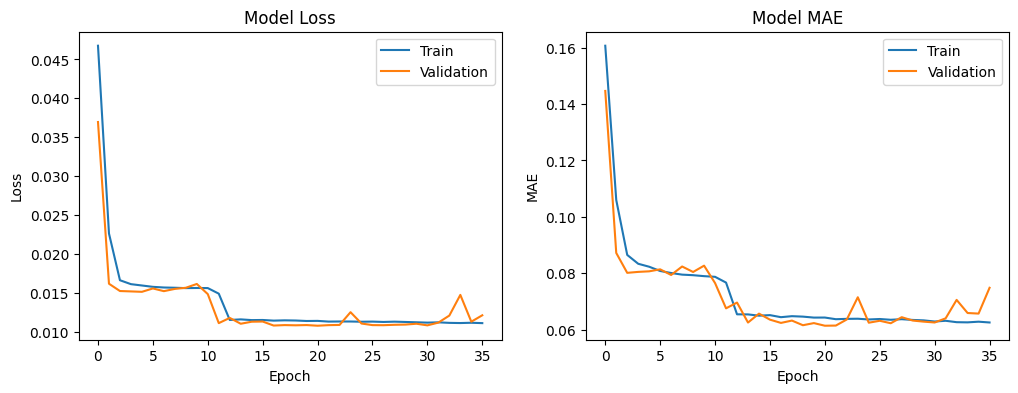

In [ ]:
plot_result(history1)

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-100])
#     for i in range(num):
#         temp = data_pred[-300:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
pred1 = model1.predict(X_test_scaled)
pred1.shape

162/162 [==============================] - 0s 2ms/step


(5174, 10)

In [ ]:
pred1[0]

array([0.03506005, 0.        , 0.        , 0.03537483, 0.03575139,
       0.03625311, 0.0364407 , 0.03673251, 0.03778237, 0.03840899],
      dtype=float32)

In [ ]:
# prediction(MinMaxScaled)

test_data_X = X_test_scaled
test_data_y = y_test_scaled

def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i.reshape(-1, 1)))
  return np.array(temp_list)

pred1 = model1.predict(test_data_X)
pred1_ori = scaling_inverse(pred1, scaler)
y_test_ori = scaling_inverse(test_data_y, scaler)
print(mse(pred1_ori.flatten(), y_test_ori.flatten()), mae(pred1_ori.flatten(), y_test_ori.flatten()))

162/162 [==============================] - 1s 3ms/step
tf.Tensor(1791.948942359669, shape=(), dtype=float64) tf.Tensor(24.90901092571778, shape=(), dtype=float64)


In [ ]:
pred1_ori.shape

(5174, 10, 1)

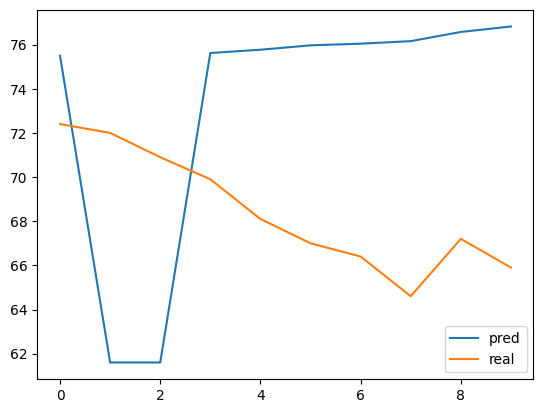

In [ ]:
i = 0
plt.plot(pred1_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

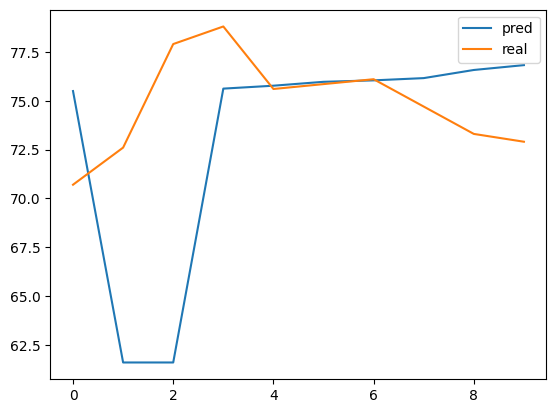

In [ ]:
i = 1
plt.plot(pred1_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

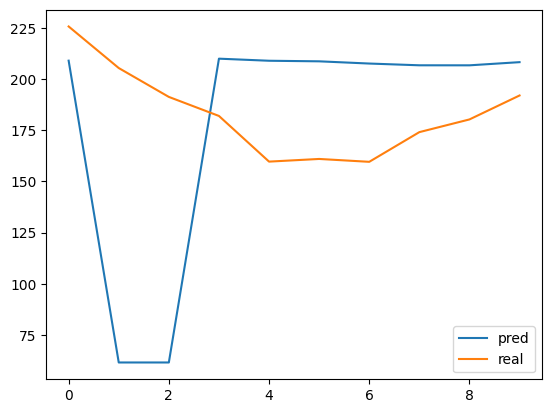

In [ ]:
i = 5
plt.plot(pred1_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

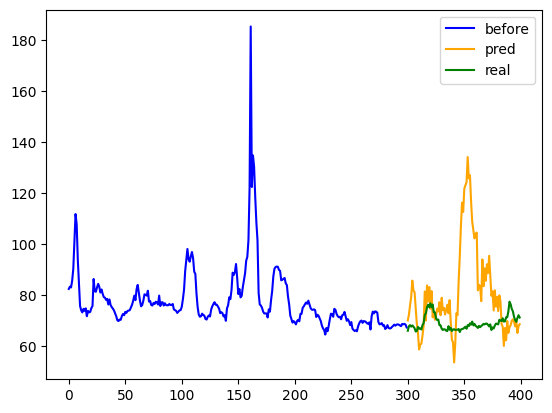

In [ ]:
# n = 300
# plt.plot(df['value'].values[-n-100:-100], label='before', color='blue')
# plt.plot(range(n, n+100), pred1, label='pred', color='orange')
# plt.plot(range(n, n+100), y_test, label='real', color='green')
# plt.legend()

In [ ]:
model1.save('/content/drive/My Drive/ai_project/model/CNN_3-1.keras')

# Model 2 - 100 to 10, attempt 1

In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n, 1)))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='relu'))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 99, 128)           384       
                                                                 
 batch_normalization_9 (Bat  (None, 99, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 49, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 48, 64)            16448     
                                                                 
 batch_normalization_10 (Ba  (None, 48, 64)            256       
 tchNormalization)                                               
                                                      

In [ ]:
history1 = model1.fit(X_train_scaled, y_train_scaled,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_split=0.2,
                        callbacks=[custom_early_stopping])

Epoch 1/100
518/518 [==============================] - 10s 11ms/step - loss: 0.0056 - mae: 0.0510 - val_loss: 0.0067 - val_mae: 0.0646
Epoch 2/100
518/518 [==============================] - 4s 8ms/step - loss: 0.0040 - mae: 0.0437 - val_loss: 0.0050 - val_mae: 0.0502
Epoch 3/100
518/518 [==============================] - 5s 9ms/step - loss: 0.0036 - mae: 0.0418 - val_loss: 0.0036 - val_mae: 0.0396
Epoch 4/100
518/518 [==============================] - 6s 11ms/step - loss: 0.0033 - mae: 0.0394 - val_loss: 0.0029 - val_mae: 0.0373
Epoch 5/100
518/518 [==============================] - 4s 9ms/step - loss: 0.0031 - mae: 0.0384 - val_loss: 0.0030 - val_mae: 0.0393
Epoch 6/100
518/518 [==============================] - 4s 8ms/step - loss: 0.0029 - mae: 0.0370 - val_loss: 0.0031 - val_mae: 0.0361
Epoch 7/100
518/518 [==============================] - 6s 11ms/step - loss: 0.0027 - mae: 0.0358 - val_loss: 0.0028 - val_mae: 0.0352
Epoch 8/100
518/518 [==============================] - 4s 8ms/ste

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

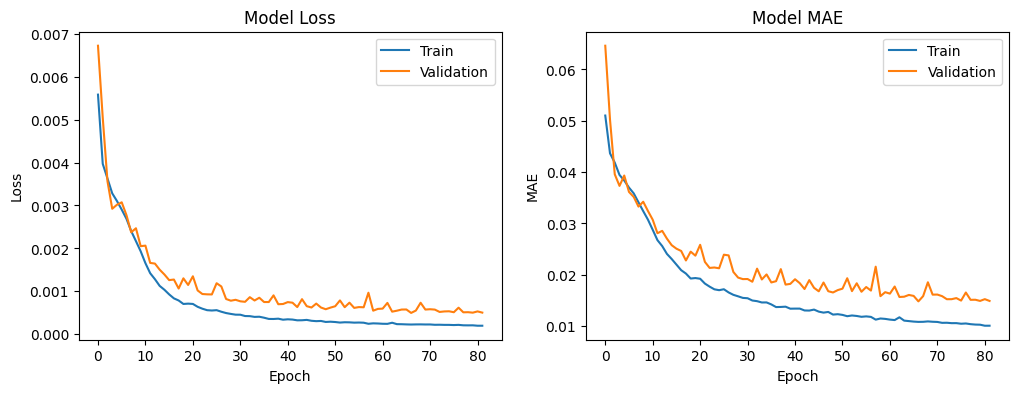

In [ ]:
plot_result(history1)

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-100])
#     for i in range(num):
#         temp = data_pred[-300:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
# prediction(MinMaxScaled)

test_data_X = X_test_scaled
test_data_y = y_test_scaled

def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i.reshape(-1, 1)))
  return np.array(temp_list)

pred1 = model1.predict(test_data_X)
pred1_ori = scaling_inverse(pred1, scaler)
y_test_ori = scaling_inverse(test_data_y, scaler)
print(mse(pred1_ori, y_test_ori), mae(pred1_ori, y_test_ori))

162/162 [==============================] - 1s 4ms/step
tf.Tensor(80.15624119860944, shape=(), dtype=float64) tf.Tensor(5.948017963274676, shape=(), dtype=float64)


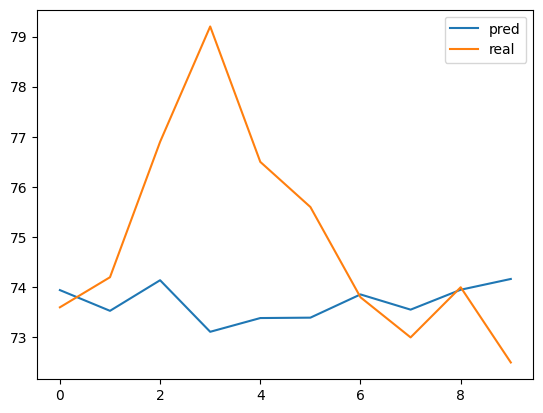

In [ ]:
i = 19
plt.plot(pred1_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

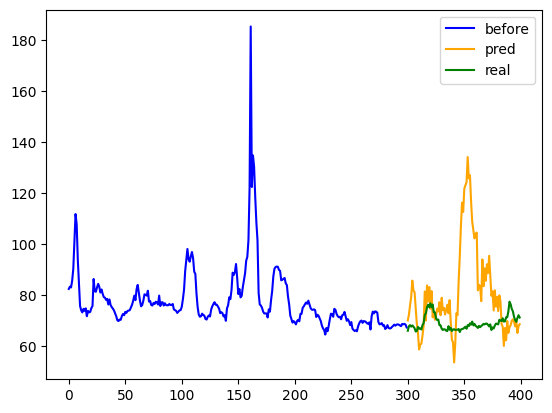

In [ ]:
# n = 300
# plt.plot(df['value'].values[-n-100:-100], label='before', color='blue')
# plt.plot(range(n, n+100), pred1, label='pred', color='orange')
# plt.plot(range(n, n+100), y_test, label='real', color='green')
# plt.legend()

# Model 3 - 100 to 10, attempt 2

In [ ]:
model3 = Sequential()
model3.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n, 1)))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))

model3.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))

model3.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))

model3.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='relu'))

model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 99, 256)           768       
                                                                 
 batch_normalization_4 (Bat  (None, 99, 256)           1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 49, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 48, 128)           65664     
                                                                 
 batch_normalization_5 (Bat  (None, 48, 128)           512       
 chNormalization)                                                
                                                      

In [ ]:
history3 = model3.fit(X_train_scaled, y_train_scaled,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_split=0.2,
                        callbacks=[custom_early_stopping])

Epoch 1/100
518/518 [==============================] - 25s 22ms/step - loss: 0.0069 - mae: 0.0532 - val_loss: 0.0079 - val_mae: 0.0716
Epoch 2/100
518/518 [==============================] - 8s 15ms/step - loss: 0.0039 - mae: 0.0427 - val_loss: 0.0032 - val_mae: 0.0402
Epoch 3/100
518/518 [==============================] - 8s 16ms/step - loss: 0.0036 - mae: 0.0410 - val_loss: 0.0042 - val_mae: 0.0409
Epoch 4/100
518/518 [==============================] - 9s 17ms/step - loss: 0.0033 - mae: 0.0394 - val_loss: 0.0031 - val_mae: 0.0365
Epoch 5/100
518/518 [==============================] - 7s 14ms/step - loss: 0.0031 - mae: 0.0385 - val_loss: 0.0030 - val_mae: 0.0363
Epoch 6/100
518/518 [==============================] - 5s 10ms/step - loss: 0.0028 - mae: 0.0366 - val_loss: 0.0029 - val_mae: 0.0363
Epoch 7/100
518/518 [==============================] - 6s 11ms/step - loss: 0.0026 - mae: 0.0352 - val_loss: 0.0029 - val_mae: 0.0357
Epoch 8/100
518/518 [==============================] - 7s 13m

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

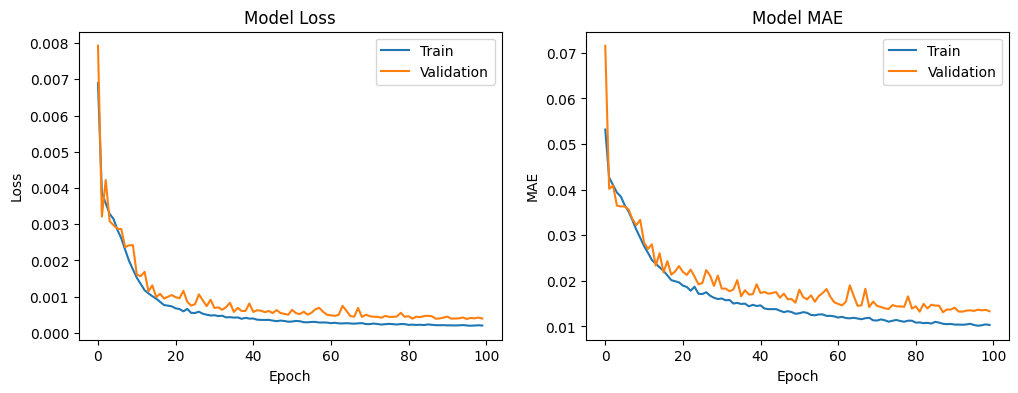

In [ ]:
plot_result(history3)

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-100])
#     for i in range(num):
#         temp = data_pred[-300:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
# prediction(MinMaxScaled)

test_data_X = X_test_scaled
test_data_y = y_test_scaled

def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i.reshape(-1, 1)))
  return np.array(temp_list)

pred3 = model3.predict(test_data_X)
pred3_ori = scaling_inverse(pred3, scaler)
y_test_ori = scaling_inverse(test_data_y, scaler)
print(mse(pred3_ori, y_test_ori), mae(pred3_ori, y_test_ori))

162/162 [==============================] - 1s 3ms/step
tf.Tensor(59.544224998532215, shape=(), dtype=float64) tf.Tensor(5.251721136720988, shape=(), dtype=float64)


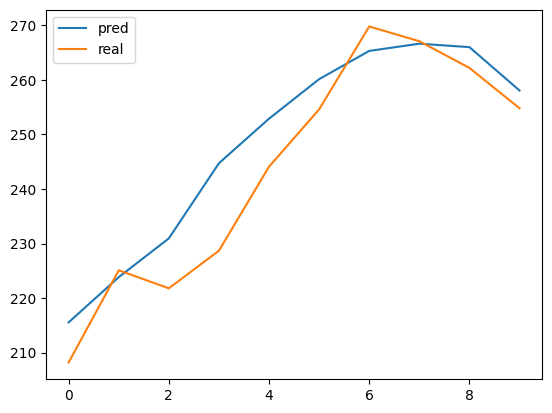

In [ ]:
i = 1210
plt.plot(pred3_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

In [ ]:
# model3.save('/content/drive/My Drive/ai_project/model/CNN_3-3.keras')

# Model 4 - 100 to 10, attempt 3

In [ ]:
model4 = Sequential()
model4.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n, 1)))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))

model4.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))

model4.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))

model4.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(10, activation='relu'))

model4.compile(loss='mse', optimizer='adam', metrics=['mae'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 99, 256)           768       
                                                                 
 batch_normalization_12 (Ba  (None, 99, 256)           1024      
 tchNormalization)                                               
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 49, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 48, 128)           65664     
                                                                 
 batch_normalization_13 (Ba  (None, 48, 128)           512       
 tchNormalization)                                               
                                                      

In [ ]:
history4 = model4.fit(X_train_scaled, y_train_scaled,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_split=0.2,
                        callbacks=[custom_early_stopping])

Epoch 1/100
518/518 [==============================] - 15s 19ms/step - loss: 0.0070 - mae: 0.0532 - val_loss: 0.0081 - val_mae: 0.0746
Epoch 2/100
518/518 [==============================] - 10s 19ms/step - loss: 0.0038 - mae: 0.0427 - val_loss: 0.0033 - val_mae: 0.0394
Epoch 3/100
518/518 [==============================] - 8s 16ms/step - loss: 0.0035 - mae: 0.0411 - val_loss: 0.0036 - val_mae: 0.0422
Epoch 4/100
518/518 [==============================] - 7s 13ms/step - loss: 0.0033 - mae: 0.0396 - val_loss: 0.0033 - val_mae: 0.0401
Epoch 5/100
518/518 [==============================] - 10s 20ms/step - loss: 0.0030 - mae: 0.0377 - val_loss: 0.0028 - val_mae: 0.0358
Epoch 6/100
518/518 [==============================] - 6s 11ms/step - loss: 0.0028 - mae: 0.0369 - val_loss: 0.0027 - val_mae: 0.0365
Epoch 7/100
518/518 [==============================] - 7s 13ms/step - loss: 0.0025 - mae: 0.0346 - val_loss: 0.0025 - val_mae: 0.0343
Epoch 8/100
518/518 [==============================] - 7s 1

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

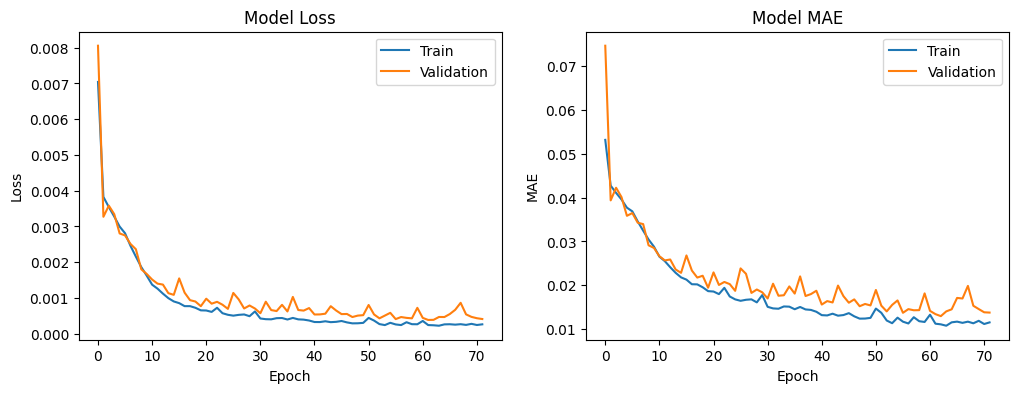

In [ ]:
plot_result(history4)

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-100])
#     for i in range(num):
#         temp = data_pred[-300:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
# prediction(MinMaxScaled)

test_data_X = X_test_scaled
test_data_y = y_test_scaled

def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i.reshape(-1, 1)))
  return np.array(temp_list)

pred4 = model4.predict(test_data_X)
pred4_ori = scaling_inverse(pred4, scaler)
y_test_ori = scaling_inverse(test_data_y, scaler)
print(mse(pred4_ori, y_test_ori), mae(pred4_ori, y_test_ori))

162/162 [==============================] - 1s 3ms/step
tf.Tensor(60.21568346761934, shape=(), dtype=float64) tf.Tensor(5.366528126009052, shape=(), dtype=float64)


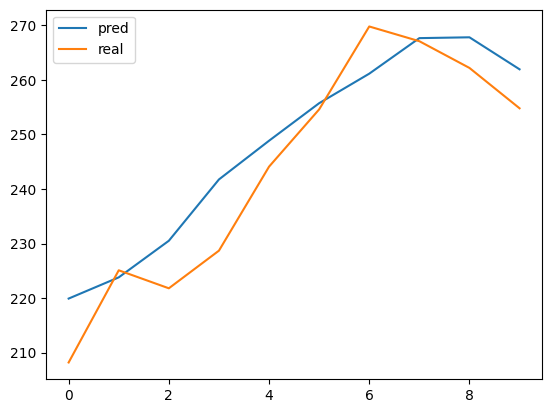

In [ ]:
i = 1210
plt.plot(pred4_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

In [ ]:
model4.save('/content/drive/My Drive/ai_project/model/CNN_3-4.keras')

# Model 5 - 150 to 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Conv1D, MaxPooling1D
from keras import Input
# from keras.layers import Conv1D, MaxPooling1D

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 150 # 150일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

temp_data = df['value'].values

scaler = MinMaxScaler()
temp_data_scaled = scaler.fit_transform(temp_data.reshape(-1, 1))[:, 0]

# 이후 10일 데이터 예측
X_scaled = np.array([temp_data_scaled[i:i+n] for i in range(len(df)-n-test_num+1)])
y_scaled = np.array([temp_data_scaled[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

X_scaled = X_scaled.reshape((-1, n, 1))
y_scaled = y_scaled.reshape((-1, 10, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

from keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(np.array(X_scaled), np.array(y_scaled), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model5 = Sequential()
model5.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n, 1)))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))

model5.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))

model5.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))

model5.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))

model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(10, activation='relu'))

model5.compile(loss='mse', optimizer='adam', metrics=['mae'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 149, 256)          768       
                                                                 
 batch_normalization_16 (Ba  (None, 149, 256)          1024      
 tchNormalization)                                               
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 74, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 73, 128)           65664     
                                                                 
 batch_normalization_17 (Ba  (None, 73, 128)           512       
 tchNormalization)                                               
                                                      

In [ ]:
history5 = model5.fit(X_train_scaled, y_train_scaled,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_split=0.2,
                        callbacks=[custom_early_stopping])

Epoch 1/100
517/517 [==============================] - 13s 14ms/step - loss: 0.0047 - mae: 0.0464 - val_loss: 0.0067 - val_mae: 0.0705
Epoch 2/100
517/517 [==============================] - 6s 12ms/step - loss: 0.0038 - mae: 0.0426 - val_loss: 0.0045 - val_mae: 0.0419
Epoch 3/100
517/517 [==============================] - 8s 15ms/step - loss: 0.0036 - mae: 0.0415 - val_loss: 0.0033 - val_mae: 0.0383
Epoch 4/100
517/517 [==============================] - 6s 12ms/step - loss: 0.0031 - mae: 0.0385 - val_loss: 0.0030 - val_mae: 0.0369
Epoch 5/100
517/517 [==============================] - 8s 15ms/step - loss: 0.0025 - mae: 0.0350 - val_loss: 0.0026 - val_mae: 0.0345
Epoch 6/100
517/517 [==============================] - 6s 12ms/step - loss: 0.0020 - mae: 0.0314 - val_loss: 0.0021 - val_mae: 0.0334
Epoch 7/100
517/517 [==============================] - 7s 13ms/step - loss: 0.0017 - mae: 0.0289 - val_loss: 0.0017 - val_mae: 0.0291
Epoch 8/100
517/517 [==============================] - 7s 14m

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

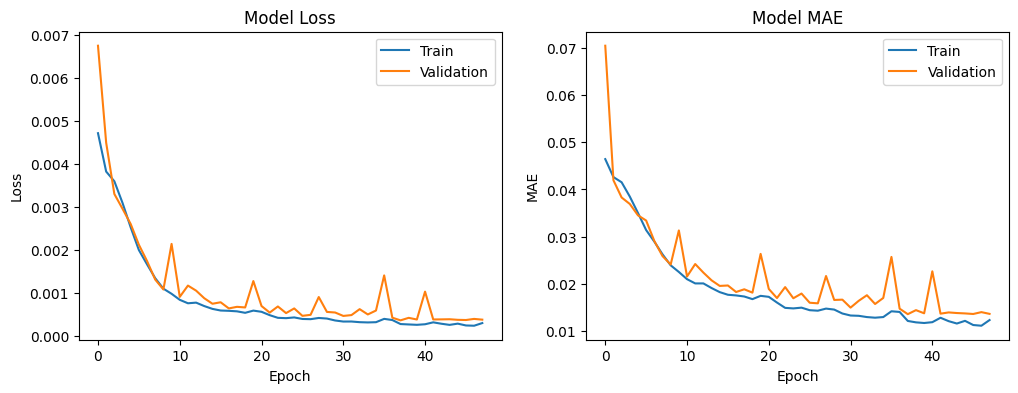

In [ ]:
plot_result(history5)

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-100])
#     for i in range(num):
#         temp = data_pred[-300:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
# prediction(MinMaxScaled)

test_data_X = X_test_scaled
test_data_y = y_test_scaled

def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i.reshape(-1, 1)))
  return np.array(temp_list)

pred5 = model5.predict(test_data_X)
pred5_ori = scaling_inverse(pred5, scaler)
y_test_ori = scaling_inverse(test_data_y, scaler)
print(mse(pred5_ori, y_test_ori), mae(pred5_ori, y_test_ori))

162/162 [==============================] - 1s 3ms/step
tf.Tensor(60.88383138093125, shape=(), dtype=float64) tf.Tensor(5.4098112337338184, shape=(), dtype=float64)


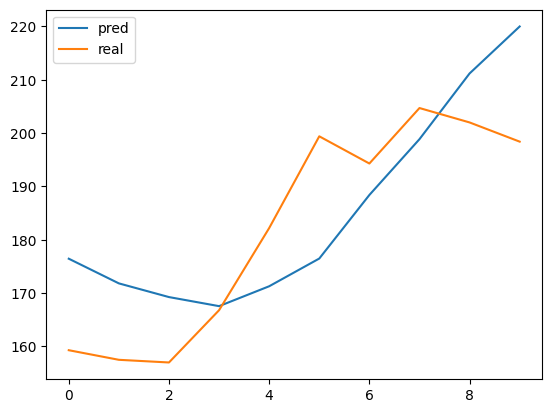

In [ ]:
i = 1210
plt.plot(pred5_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

In [ ]:
model5.save('/content/drive/My Drive/ai_project/model/CNN_3-5.keras')

# Model 6 - 50 to 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Conv1D, MaxPooling1D
from keras import Input
# from keras.layers import Conv1D, MaxPooling1D

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 50 # 50일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

temp_data = df['value'].values

scaler = MinMaxScaler()
temp_data_scaled = scaler.fit_transform(temp_data.reshape(-1, 1))[:, 0]

# 이후 10일 데이터 예측
X_scaled = np.array([temp_data_scaled[i:i+n] for i in range(len(df)-n-test_num+1)])
y_scaled = np.array([temp_data_scaled[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

X_scaled = X_scaled.reshape((-1, n, 1))
y_scaled = y_scaled.reshape((-1, 10, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

from keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(np.array(X_scaled), np.array(y_scaled), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model6 = Sequential()
model6.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n, 1)))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))

model6.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))

model6.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))

model6.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))

model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(10, activation='relu'))

model6.compile(loss='mse', optimizer='adam', metrics=['mae'])

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 49, 256)           768       
                                                                 
 batch_normalization_20 (Ba  (None, 49, 256)           1024      
 tchNormalization)                                               
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 24, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_21 (Conv1D)          (None, 23, 128)           65664     
                                                                 
 batch_normalization_21 (Ba  (None, 23, 128)           512       
 tchNormalization)                                               
                                                      

In [ ]:
history6 = model6.fit(X_train_scaled, y_train_scaled,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_split=0.2,
                        callbacks=[custom_early_stopping])

Epoch 1/100
519/519 [==============================] - 11s 12ms/step - loss: 0.0088 - mae: 0.0582 - val_loss: 0.0109 - val_mae: 0.0802
Epoch 2/100
519/519 [==============================] - 7s 13ms/step - loss: 0.0079 - mae: 0.0550 - val_loss: 0.0082 - val_mae: 0.0545
Epoch 3/100
519/519 [==============================] - 6s 11ms/step - loss: 0.0078 - mae: 0.0544 - val_loss: 0.0071 - val_mae: 0.0500
Epoch 4/100
519/519 [==============================] - 7s 13ms/step - loss: 0.0076 - mae: 0.0526 - val_loss: 0.0072 - val_mae: 0.0524
Epoch 5/100
519/519 [==============================] - 6s 12ms/step - loss: 0.0073 - mae: 0.0512 - val_loss: 0.0067 - val_mae: 0.0493
Epoch 6/100
519/519 [==============================] - 6s 11ms/step - loss: 0.0072 - mae: 0.0503 - val_loss: 0.0070 - val_mae: 0.0495
Epoch 7/100
519/519 [==============================] - 8s 15ms/step - loss: 0.0071 - mae: 0.0497 - val_loss: 0.0091 - val_mae: 0.0645
Epoch 8/100
519/519 [==============================] - 6s 11m

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

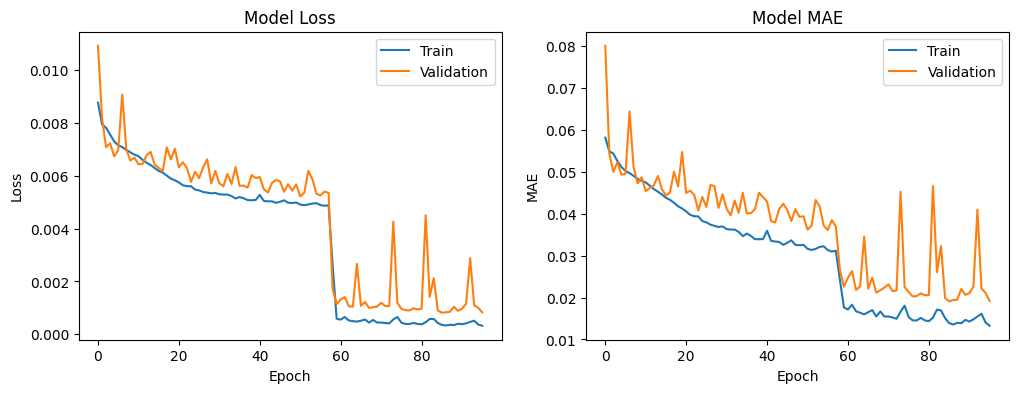

In [ ]:
plot_result(history6)

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-100])
#     for i in range(num):
#         temp = data_pred[-300:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
# prediction(MinMaxScaled)

test_data_X = X_test_scaled
test_data_y = y_test_scaled

def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i.reshape(-1, 1)))
  return np.array(temp_list)

pred6 = model6.predict(test_data_X)
pred6_ori = scaling_inverse(pred6, scaler)
y_test_ori = scaling_inverse(test_data_y, scaler)
print(mse(pred6_ori, y_test_ori), mae(pred6_ori, y_test_ori))

162/162 [==============================] - 1s 3ms/step
tf.Tensor(137.58900743228992, shape=(), dtype=float64) tf.Tensor(7.769784058681312, shape=(), dtype=float64)


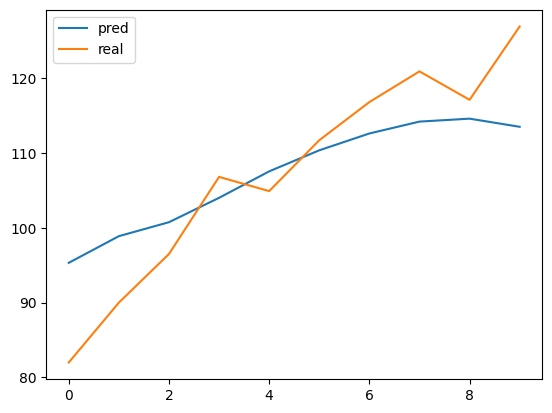

In [ ]:
i = 1210
plt.plot(pred6_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

In [ ]:
model6.save('/content/drive/My Drive/ai_project/model/CNN_3-6.keras')

# Model 7 - 300 to 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Conv1D, MaxPooling1D
from keras import Input
# from keras.layers import Conv1D, MaxPooling1D

from keras.metrics import mean_squared_error
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

n = 300 # 300일간 데이터 input
test_num = 10 # 10일간 데이터 output

df_forplot = df[-test_num:]
df = df[:-test_num]

temp_data = df['value'].values

scaler = MinMaxScaler()
temp_data_scaled = scaler.fit_transform(temp_data.reshape(-1, 1))[:, 0]

# 이후 10일 데이터 예측
X_scaled = np.array([temp_data_scaled[i:i+n] for i in range(len(df)-n-test_num+1)])
y_scaled = np.array([temp_data_scaled[i+n:i+n+test_num] for i in range(len(df)-n-test_num+1)])

X_scaled = X_scaled.reshape((-1, n, 1))
y_scaled = y_scaled.reshape((-1, 10, 1))

def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

from keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(np.array(X_scaled), np.array(y_scaled), test_size=0.2, random_state=42)

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model7 = Sequential()
model7.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n, 1)))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))

model7.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))

model7.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))

model7.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))

model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(128, activation='relu'))
model7.add(Dense(128, activation='relu'))
model7.add(Dense(128, activation='relu'))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dense(10, activation='relu'))

model7.compile(loss='mse', optimizer='adam', metrics=['mae'])

model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 299, 256)          768       
                                                                 
 batch_normalization_24 (Ba  (None, 299, 256)          1024      
 tchNormalization)                                               
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 149, 256)          0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 148, 128)          65664     
                                                                 
 batch_normalization_25 (Ba  (None, 148, 128)          512       
 tchNormalization)                                               
                                                      

In [ ]:
history7 = model7.fit(X_train_scaled, y_train_scaled,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_split=0.2,
                        callbacks=[custom_early_stopping])

Epoch 1/100
514/514 [==============================] - 23s 27ms/step - loss: 0.0049 - mae: 0.0474 - val_loss: 0.0123 - val_mae: 0.0908
Epoch 2/100
514/514 [==============================] - 9s 17ms/step - loss: 0.0036 - mae: 0.0417 - val_loss: 0.0029 - val_mae: 0.0383
Epoch 3/100
514/514 [==============================] - 11s 21ms/step - loss: 0.0028 - mae: 0.0369 - val_loss: 0.0026 - val_mae: 0.0357
Epoch 4/100
514/514 [==============================] - 9s 18ms/step - loss: 0.0021 - mae: 0.0320 - val_loss: 0.0019 - val_mae: 0.0298
Epoch 5/100
514/514 [==============================] - 6s 12ms/step - loss: 0.0014 - mae: 0.0266 - val_loss: 0.0018 - val_mae: 0.0312
Epoch 6/100
514/514 [==============================] - 7s 15ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 0.0015 - val_mae: 0.0260
Epoch 7/100
514/514 [==============================] - 7s 13ms/step - loss: 8.9232e-04 - mae: 0.0216 - val_loss: 9.7250e-04 - val_mae: 0.0215
Epoch 8/100
514/514 [==============================]

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

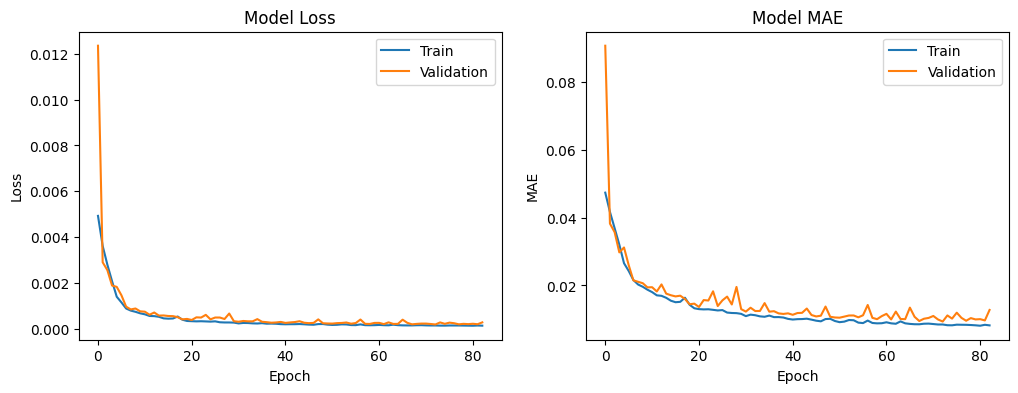

In [ ]:
plot_result(history7)

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-100])
#     for i in range(num):
#         temp = data_pred[-300:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
# prediction(MinMaxScaled)

test_data_X = X_test_scaled
test_data_y = y_test_scaled

def scaling_inverse(ar, scaler):
  temp_list = []
  for i in ar:
    temp_list.append(scaler.inverse_transform(i.reshape(-1, 1)))
  return np.array(temp_list)

pred7 = model7.predict(test_data_X)
pred7_ori = scaling_inverse(pred7, scaler)
y_test_ori = scaling_inverse(test_data_y, scaler)
print(mse(pred7_ori, y_test_ori), mae(pred7_ori, y_test_ori))

161/161 [==============================] - 1s 4ms/step
tf.Tensor(32.726439972572564, shape=(), dtype=float64) tf.Tensor(3.772760639039026, shape=(), dtype=float64)


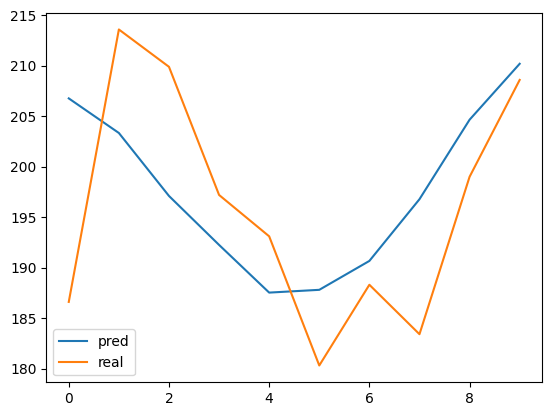

In [ ]:
i = 1211
plt.plot(pred7_ori[i], label='pred')
plt.plot(y_test_ori[i], label='real')
plt.legend()

In [ ]:
model7.save('/content/drive/My Drive/ai_project/model/CNN_3-7.keras')

# Model 8

# Model 9

# Model 10

# Model 11